# Описание проекта<a name="0."></a>
<font size="2">([к содержанию](#0.0))</font>

Вы работаете в интернет-магазине <b>«Стримчик»</b>, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, <b>Xbox</b> или <b>PlayStation</b>). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br/><br/>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br/><br/>
В наборе данных попадается аббревиатура <b>ESRB (Entertainment Software Rating Board)</b> — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <b>ESRB</b> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

## Описание данных и импорт библиотек

* <b>Name</b> — название игры
* <b>Platform</b> — платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)
* <b>EU_sales</b> — продажи в Европе (миллионы долларов)
* <b>JP_sales</b> — продажи в Японии (миллионы долларов)
* <b>Other_sales</b> — продажи в других странах (миллионы долларов)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.





<b>Импортирую библиотеки:</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

<br/><a name="1."></a>
## Ознакомление с данными
<font size="2">([к содержанию](#0.0))</font>

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
#games.head(20)
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Общая информация
<font size="2">([к содержанию](#0.0))</font>

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропусков много. Проверю их подробнее чуть ниже.

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Необходимо будет привести названия столбцов к правильному типу.

In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропусков достаточно много, разбирусь с ними более подробно уже на этапе работы с данными.

Далее проверю, нет ли повторений в названиях платформ, в жарнах, и есть ли в таблице дубликанты.

In [7]:
games.duplicated().sum()

0

In [8]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
games.dropna(subset=['Name'], inplace=True)
print(games.isna().sum())

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64


In [10]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [11]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Выводы по данным:**
1. Необходимо привести столбцы к правильному типу.
2. Необходимо привести столбцы к нижнему регистру.
3. Повторений и дубликантов не обнаружил.


В ходе подготовки данных поработаю более подробно и опишу последовательность действий.

## Подготовка данных<a name="2."></a>
<font size="2">([к содержанию](#0.0))</font>

**Задачи:**
1. Подготовьте данные
2. Замените названия столбцов (приведите к нижнему регистру);
3. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
4. Обработайте пропуски при необходимости:
5. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
6. Опишите причины, которые могли привести к пропускам;
7. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
8. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<br/><a name="2.1."></a>
### Перевод названия столбцов к нижнему регистру</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [12]:
games.columns = games.columns.str.lower()
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<br/><a name="2.2."></a>
### Изменение типов данных</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

In [13]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()
games

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразовал год создания к необходимому типу данных. Год релиза выглядит по человечески сейчас. Далее проверю оценку пользователей

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


In [16]:
import warnings
warnings.filterwarnings('ignore')
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games[games['user_score'] == 'tbd']
games['user_score'].dtype

dtype('float64')

'tbd' судя из описания означает to be determined, to be done. Данные были не заполнены, так как не определились с рейтингом. Поэтому заменил tbd на Nan.

Далее необходимо определить сумму продаж по регионам, для это делаю новый столбец.

### Создам столбец с суммой продаж по всем регионам 'sales_total'<br/>
<font size="2">([к содержанию](#0.0))</font>

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Выводы по разделу:**
1. Подготовил данные.
2. Заменил названия столбцов (привел к нижнему регистру);
3. Преобразовал данные столбца year_of_release в int 64.

4-5. По поводу пропусков жёстких требований не стояло, пока решил не трогать их, поскольку на анализ пока не влияют. 
6. Причинами пропуска могут быть: снизкая популярность игры (не получила оценку критиков), низкое распространение игры (только в конктретном регионе, например только Япония), в единичных случаях это сокрытие информации, ошибки в заполнении таблицы. 

7. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Аббревиатуру описал, заменил на NaN.
8. Создал отдельный столбец с суммарными продажами по регионам.

In [18]:
#games['critic_score'] = games['critic_score'].fillna(-1)
#games['user_score'] = games['user_score'].fillna(-1)

In [19]:
#print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
#print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

In [20]:
#percent_hbar(games, threshold)

## Исследовательский анализ данных<a name="2."></a>
<font size="2">([к содержанию](#0.0))</font>

**Задачи:**
1. Проведите исследовательский анализ данных
2. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
3. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
4. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
5. Не учитывайте в работе данные за предыдущие годы.
6. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
7. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
8. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
9. Соотнесите выводы с продажами игр на других платформах.
10. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Построение графика продаж игр по годам</b><br/>
<font size="2">([к содержанию](#0.0))</font>

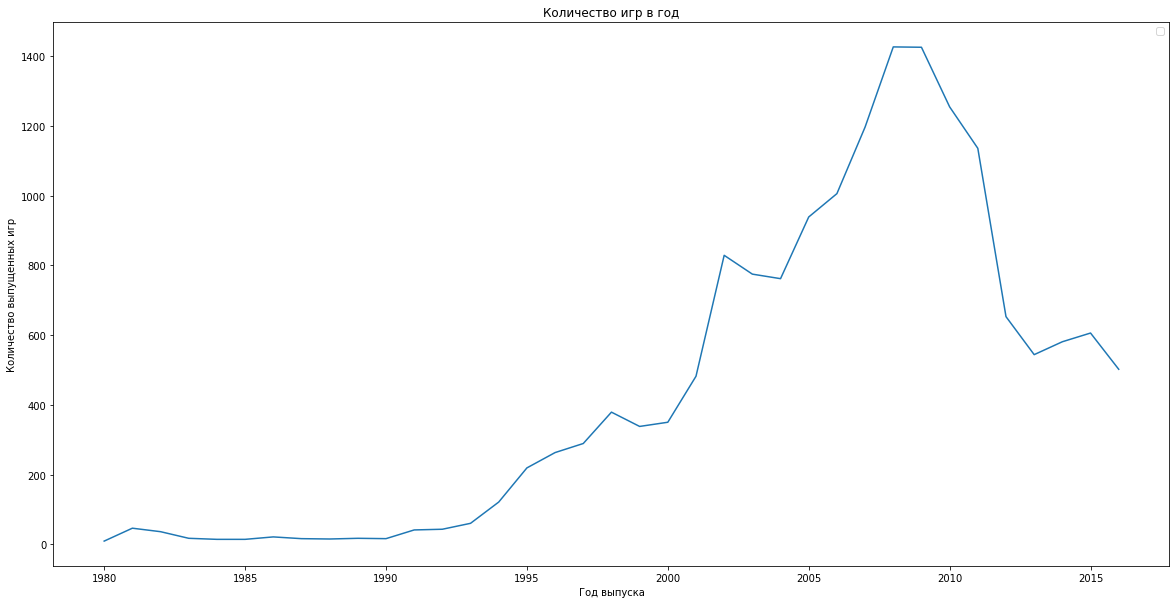

In [21]:
games_in_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(20,10))
sns.lineplot(data=games_in_year)
plt.title("Количество игр в год")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

*Вывод*:
1. Кол-во игр начало резко расти с середины 90-х до 2008-2009 года.
2. В 2009 году появился резкий спад производства игр, скорее всего связанный с развитием мобильной индустрии.

### Построю график распределения игр по платформам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Text(0, 0.5, 'Количество продаж')

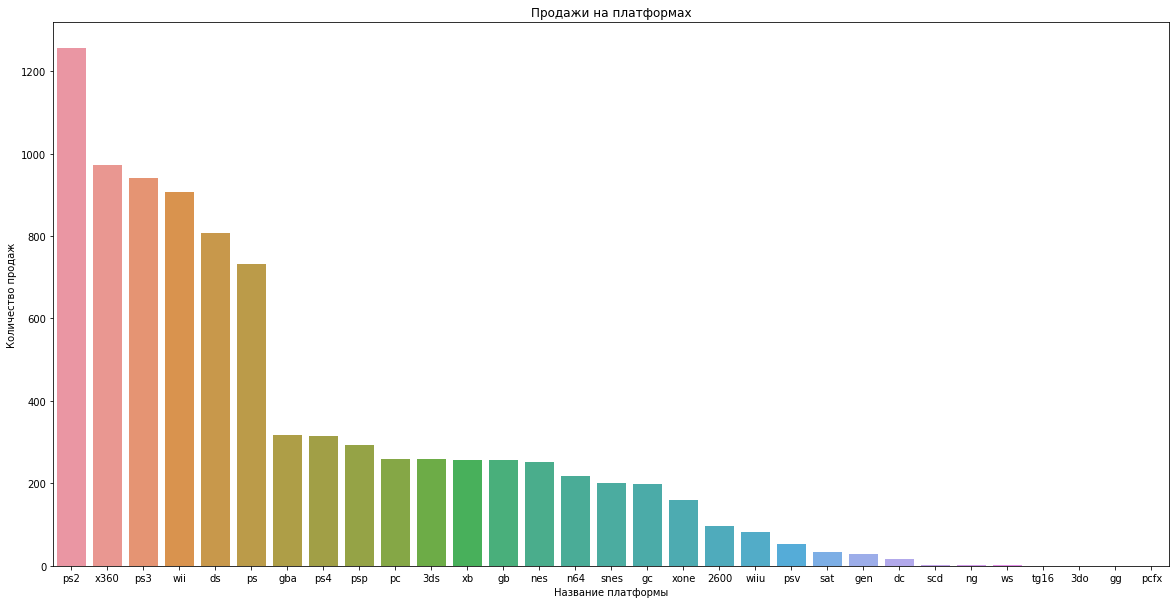

In [22]:
games_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=games_platforms.index, y=games_platforms['total_sales'])
plt.title("Продажи на платформах")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

*Вывод*:
1. Cамые популярные игровые платформы за весь период: PS2, X360, PS3, WII, DS, PS.
2. Остальные платформы менее популярны ввиду их региональности, правда там есть некоторые современные популярные платформы, но они задели маленький период, их популярность только начинает рости.

## Продажи популярных игровых платформ

Необходимо определиться с продажами популярных игровых платформ, чтобы в дальнейшем провести анализ.

In [23]:
def year_sales_for_platform(name, data):
    period = data[(data['platform'] == name) & (data['year_of_release'] > 1994)]
    total = period.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

Написал функцию, которая будет возвращать сводную таблицы по данным с 2005 года (2й скачёк продаж).

Как указано выше, самых популярных платформ исходя из данных 6. Но там Ps и Ps2. Поэтому для здоровой конкуренции оставлю топ 5. PS2, X360, PS3, WII, DS. Для определения продаж конкретно по этим платформам необходимо создать отдельную таблицу, она будет отсортирована по убыванию.

In [24]:
popular_6 = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
popular_6 = popular_6.reset_index().rename_axis(None, axis=1)
popular_6

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86


Теперь можно рассмотреть поведение этих платформ по годам

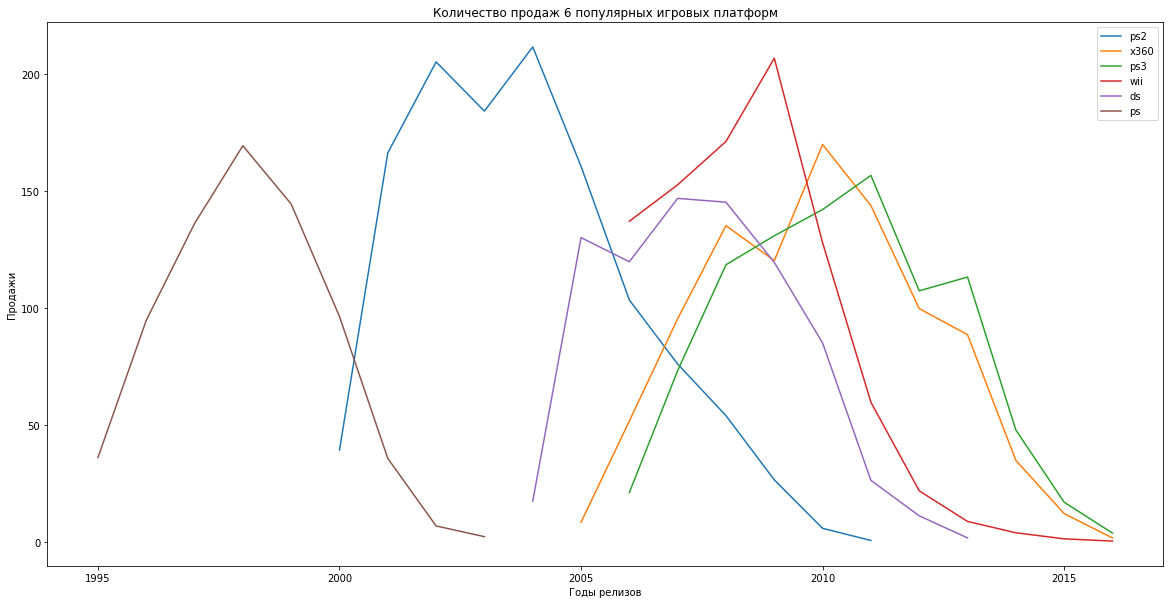

In [25]:
plt.figure(figsize=(20,10))
plt.title('Количество продаж 6 популярных игровых платформ')
plt.xlabel('Годы релизов')
plt.ylabel('Продажи') 
for i in list(popular_6['platform']):
    sns.lineplot(data=year_sales_for_platform(i,games)['total_sales'], label=i)
    plt.legend()

Время жизни консолей.
* PS с 1995 года до 2003;
* PS2 с 2000 до 2011 года;
* PS3 с 2006 по настоящее время;
* DS С 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год;
* Wii 2006 по нынешний день, в 2016 уже почти не использовалась.

Таким образом, в среднем консоль живет около 10 лет. Прогресс не стоит на месте и начинки в старых консолях перестает отвечать техническим требованиям новых игр.

Понял, допишу функцию,выберу актуальный период с 2012 по 2016 год, посмотрю динамику

In [26]:
games_for_the_perod = games[((games['year_of_release']==2012) |
                      (games['year_of_release']==2013) |
                      (games['year_of_release']==2014) |
                      (games['year_of_release']==2015) |
                      (games['year_of_release']==2016))]
games_for_the_perod

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [27]:
platforms_for_the_perod = games_for_the_perod.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platforms_for_the_perod.columns = ['_'.join(col) for col in platforms_for_the_perod.columns]
platforms_for_the_perod = platforms_for_the_perod.reset_index()
platforms_for_the_perod = platforms_for_the_perod.rename(columns={'3_D_S':'3DS',
                                                        'D_S':'DS',
                                                        'P_C':'PC',
                                                        'P_S_2':'PS2',
                                                        'P_S_3':'PS3',
                                                        'P_S_4':'PS4',
                                                        'P_S_P':'PSP',
                                                        'P_S_V':'PSV',
                                                        'W_i_i':'Wii',
                                                        'X_3_6_0':'X360',
                                                        'X_O_n_e':'XOne'})
display(platforms_for_the_perod)

,year_of_release,3_d_s,d_s,p_c,p_s_3,p_s_4,p_s_p,p_s_v,w_i_i,w_i_i_u,x_3_6_0,x_o_n_e
0,2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


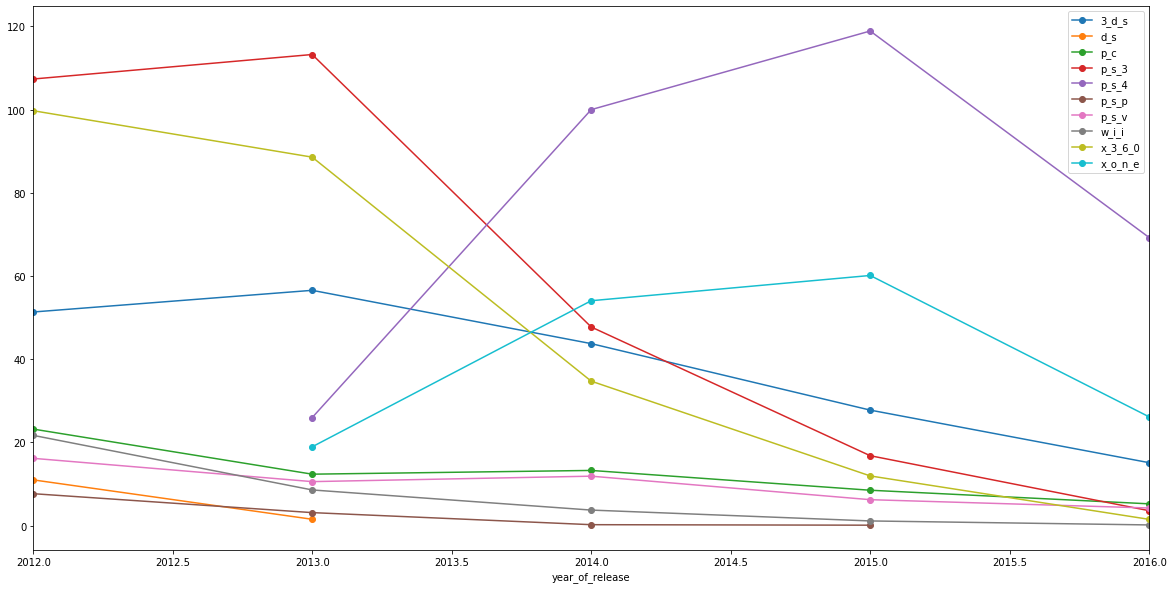

In [28]:
platforms_for_the_perod.plot(x='year_of_release', y = ['3_d_s','d_s','p_c','p_s_3','p_s_4','p_s_p','p_s_v','w_i_i','x_3_6_0','x_o_n_e'], style='o-',figsize=(20,10))
plt.show()

У всех платформ происходит падение продаж к 2016 году,так же видно, что  к 2016 году более активные платформы - это PS4, XOne, X360, WiiU, PC, PSV и 3DS. У платформ PSP и DS полностью упали продажи еще до 2016 года. Лидерами по глобальным продажам оказались платформы PS4, XOne, и 3DS. Х360 тоже ещё актуальна, но с появлением XOne она как и следует ожидать отходит в прошлое. Также ещё актуальна PS3.

**Таким образом лидеры продаж:
PS4, XOne, и 3DS.**

### Определение глобальной продажи игр по платформам

In [29]:
list_of_5 = ['ps4','xone','x360','3ds','ps3']
games_on_top_5_platforms = games_for_the_perod[games_for_the_perod['platform'].isin(['ps4','xone','x360','3ds','ps3'])]
games_on_top_5_platforms = games_on_top_5_platforms[games_on_top_5_platforms['total_sales']<4]
games_on_top_5_platforms['total_sales'].describe()

count    1771.000000
mean        0.463021
std         0.685531
min         0.010000
25%         0.050000
50%         0.180000
75%         0.570000
max         3.970000
Name: total_sales, dtype: float64

Сохранил топ 5 платформ.

Для определения медианы и среза данных по глобальным продажам проще всего воспользоваться "ящиком с усами"

Text(0, 0.5, 'Продажи')

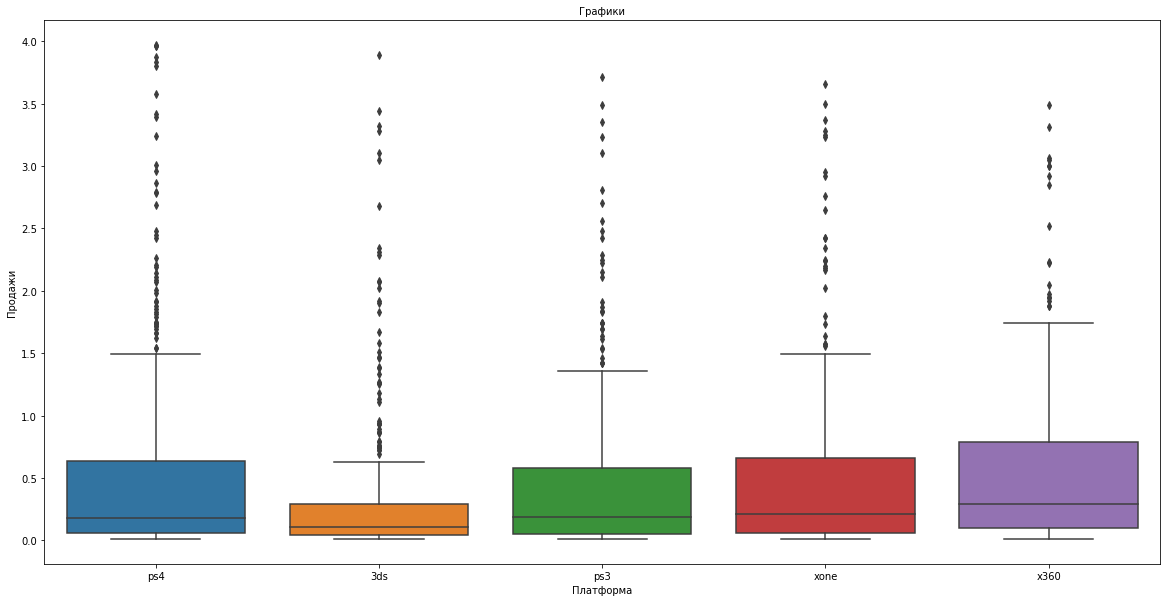

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_on_top_5_platforms, x='platform', y='total_sales')
plt.title('Графики', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Продажи',fontsize=10)

*Выводы:*
Пример 3ds маленький ящик и много выбросов. Как я понимаю основаная часть объема продаж происходит за счет этих выбросов. В то же время у XOne ситуация иная: большой ящик, длинный ус и мало выбросов, тоесть у xone покупают разные игры, причем, в немалом количестве.

In [31]:
ps_4_corr = games_for_the_perod[games_for_the_perod['platform']=='ps4']
ps_4_corr['user_score'].corr(ps_4_corr['total_sales'])

-0.031957110204556424

In [32]:
ps_4_corr['critic_score'].corr(ps_4_corr['total_sales'])

0.40656790206178095

Text(0.5, 1.0, 'Диаграмма рассеяния на основе отзывов пользователей')

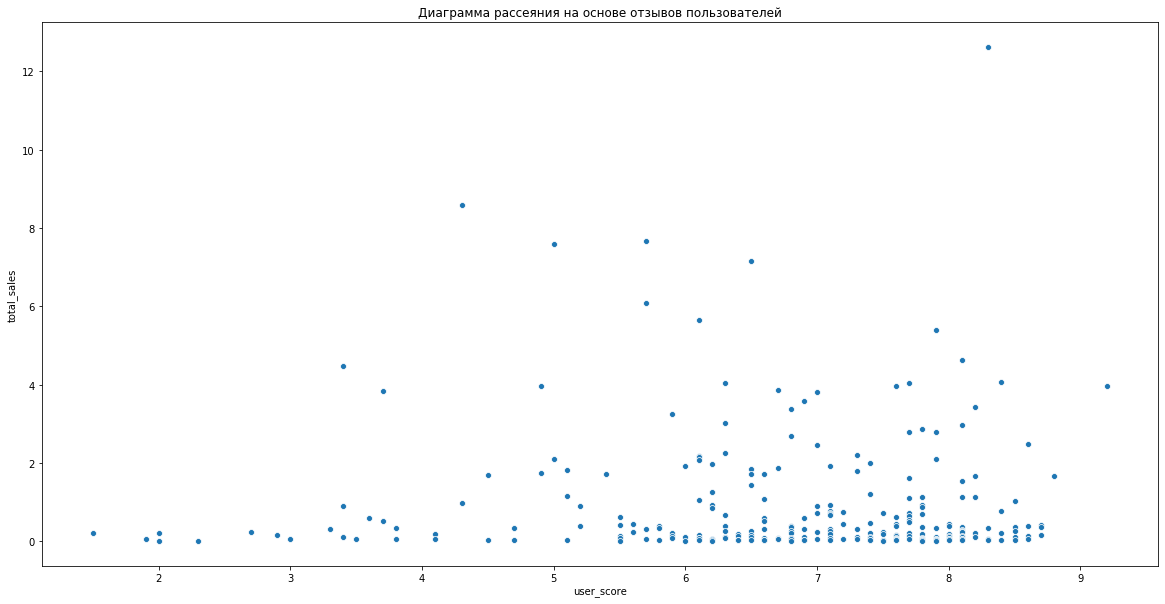

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='user_score', y='total_sales', data=ps_4_corr)
plt.title('Диаграмма рассеяния на основе отзывов пользователей')

Text(0.5, 1.0, 'Диаграмма рассеяния на основе отзывов критиков')

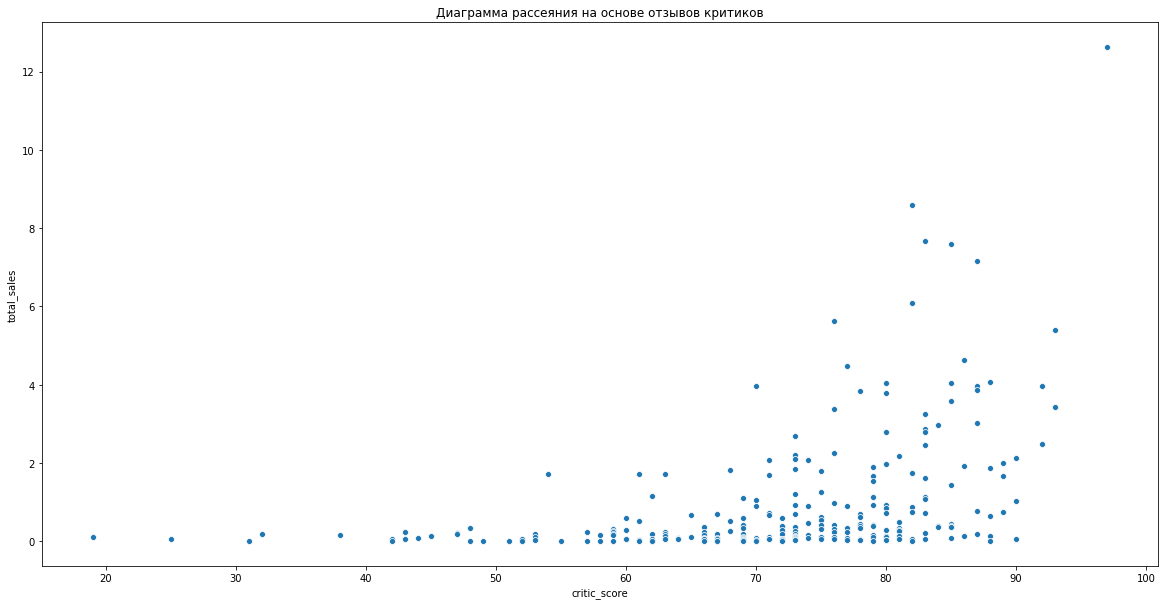

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='critic_score', y='total_sales', data=ps_4_corr)
plt.title('Диаграмма рассеяния на основе отзывов критиков')

На основе одной платформы тяжело сделать выводы, но всё же видно, что отзывы критиков влияют сильнее. Для подтверждения гипотезы необходимо провести те же самые действия для других платформ. Для этого лучше всего подготовить функцию.

In [35]:
def any_platform_corr(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(20,8))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=10)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    correlation = platform['user_score'].corr(platform['total_sales'])
    critic_correlation = platform['critic_score'].corr(platform['total_sales'])
    if 0.3 >= critic_correlation >= 0.1:
        print('Корреляция отзывов критиков и платформой ', name_of_platform.upper(), ': Очень низкая', critic_correlation)
    if 0.5 >= critic_correlation >= 0.3:
        print('Корреляция отзывов критиков и платформой ', name_of_platform.upper(), ': Низкая', critic_correlation)
    if 0.7 >= critic_correlation >= 0.5:
        print('Корреляция отзывов критиков и платформой ', name_of_platform.upper(), ': Средняя', critic_correlation)
    if 0.9 >= critic_correlation >= 0.7:
        print('Корреляция отзывов критиков и платформой ', name_of_platform.upper(), ': Высокая', critic_correlation)
    if 1 >= critic_correlation >= 0.9:
        print('Корреляция отзывов критиков и платформой ', name_of_platform.upper(), ': Максимальная', critic_correlation)    
    if 0.3 >= correlation >= 0.1:
        print('Корреляция между отзывов пользователей и продажами ', name_of_platform.upper(), ': Очень низкая', correlation)
    if 0.5 >= correlation >= 0.3:
        print('Корреляция между отзывов пользователей и продажами ', name_of_platform.upper(), ': Низкая', correlation)
    if 0.7 >= correlation >= 0.5:
        print('Корреляция между отзывов пользователей и продажами ', name_of_platform.upper(), ': Средняя', correlation)
    if 0.9 >= correlation >= 0.7:
        print('Корреляция между отзывов пользователей и продажами ', name_of_platform.upper(), ': Высокая', correlation)
    if 1 >= correlation >= 0.9:
        print('Корреляция между отзывов пользователей и продажами ', name_of_platform.upper(), ': Максимальная', correlation)
    print('\n')

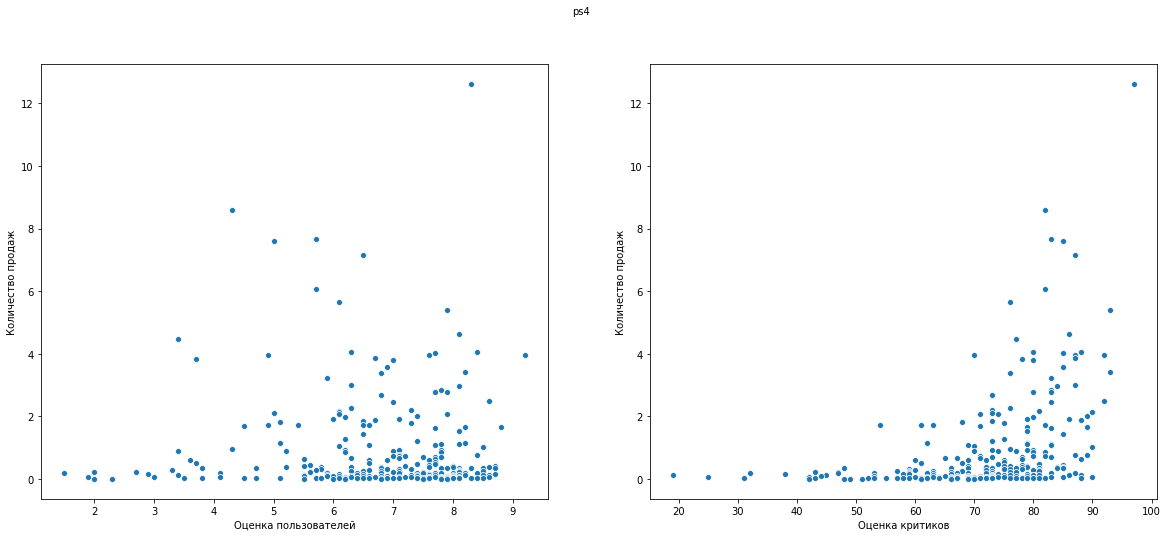

Корреляция отзывов критиков и платформой  PS4 : Низкая 0.40656790206178095




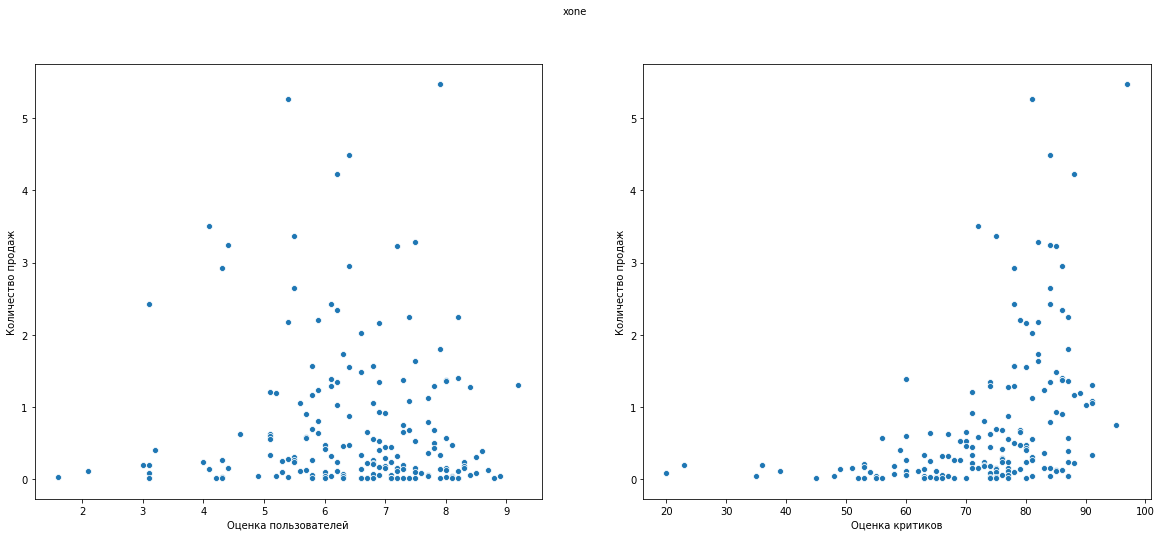

Корреляция отзывов критиков и платформой  XONE : Низкая 0.4169983280084017




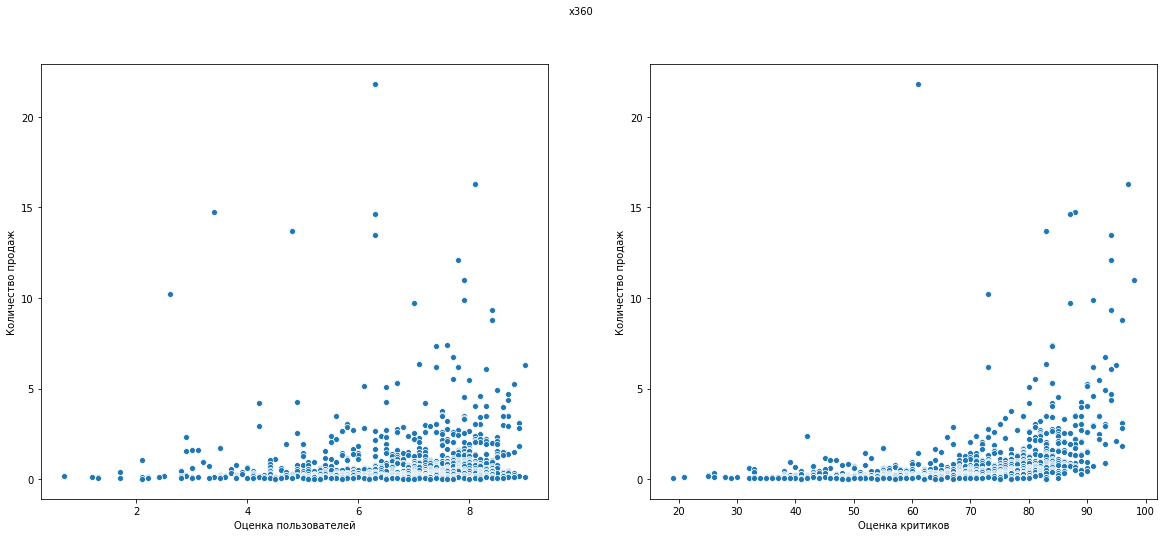

Корреляция отзывов критиков и платформой  X360 : Низкая 0.3937358653072588
Корреляция между отзывов пользователей и продажами  X360 : Очень низкая 0.11445882978454185




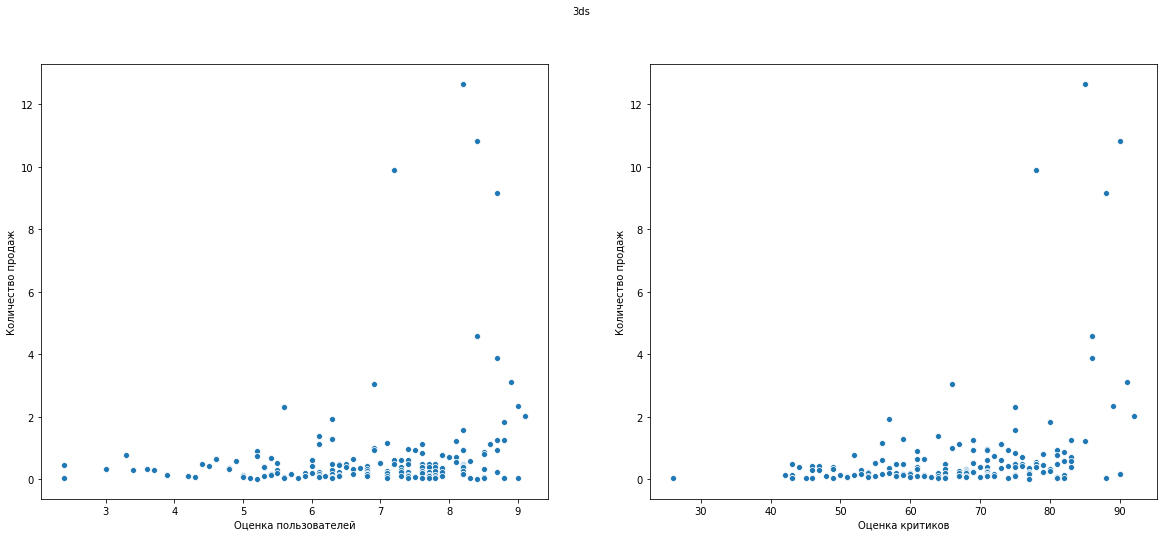

Корреляция отзывов критиков и платформой  3DS : Низкая 0.3494009303924131
Корреляция между отзывов пользователей и продажами  3DS : Очень низкая 0.22480798039571082




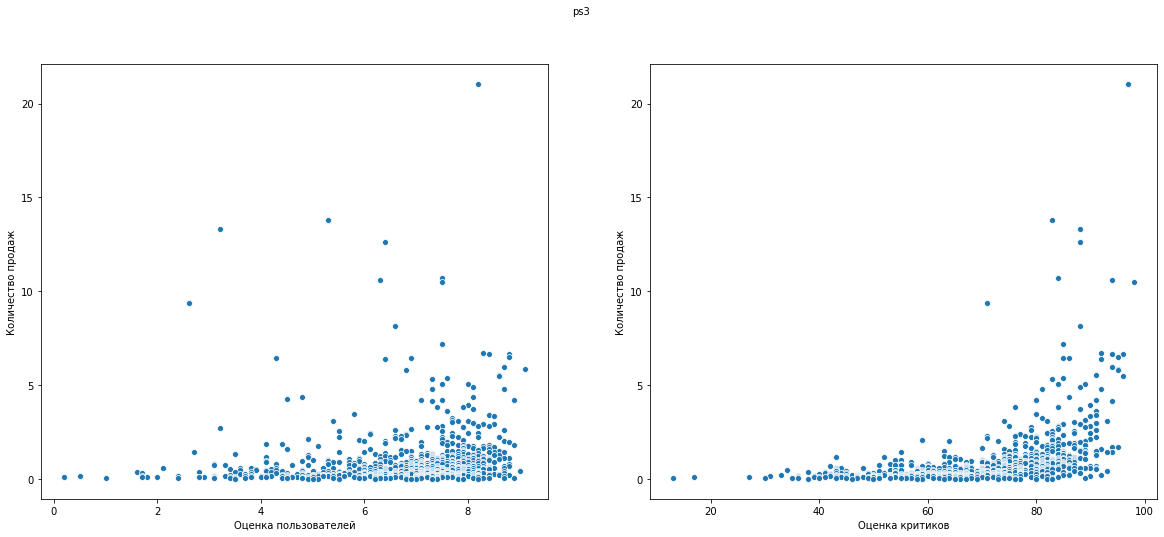

Корреляция отзывов критиков и платформой  PS3 : Низкая 0.4324315685642061
Корреляция между отзывов пользователей и продажами  PS3 : Очень низкая 0.12669133936341712




In [36]:
for platform in list_of_5:
    any_platform_corr(platform)

*Выводы:*
1. Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам, но она везде достаточно низкая.
2. Однозначно можно сказать, что оценка пользователей слабо влияет на продажи, в отличие от оценки критиков.

Далее следует проверить распределение игр по жанрам в соответствии с заданием. Попробую это сделать путем создания сводных таблиц.

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


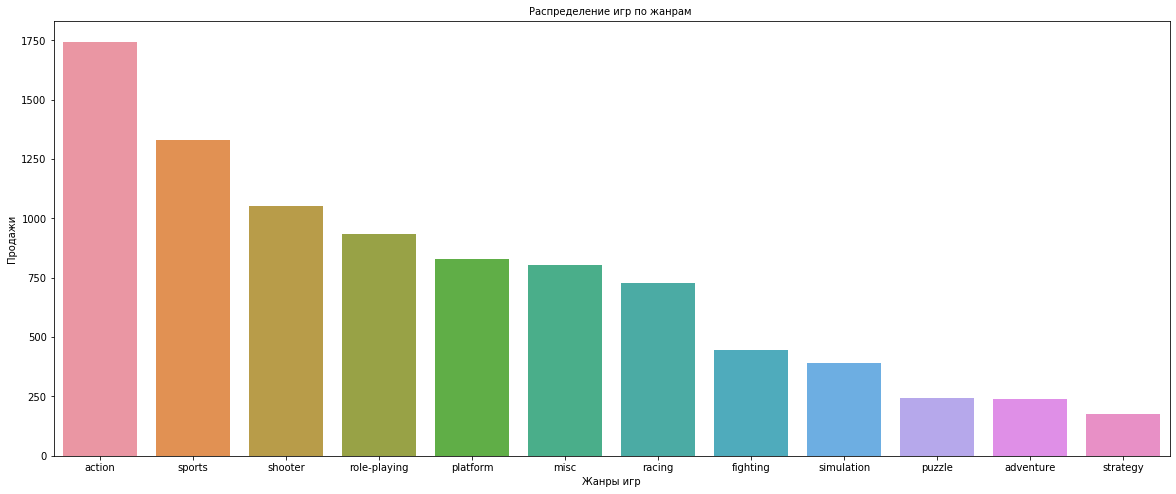

In [37]:
games_genre = games.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
games_genre = games_genre.reset_index().rename_axis(None, axis=1)
plt.figure(figsize=(20,8))
plt.title('Распределение игр по жанрам ',fontsize=10)
sns.barplot(data=games_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=10)
plt.ylabel('Продажи',fontsize=10)
games_genre

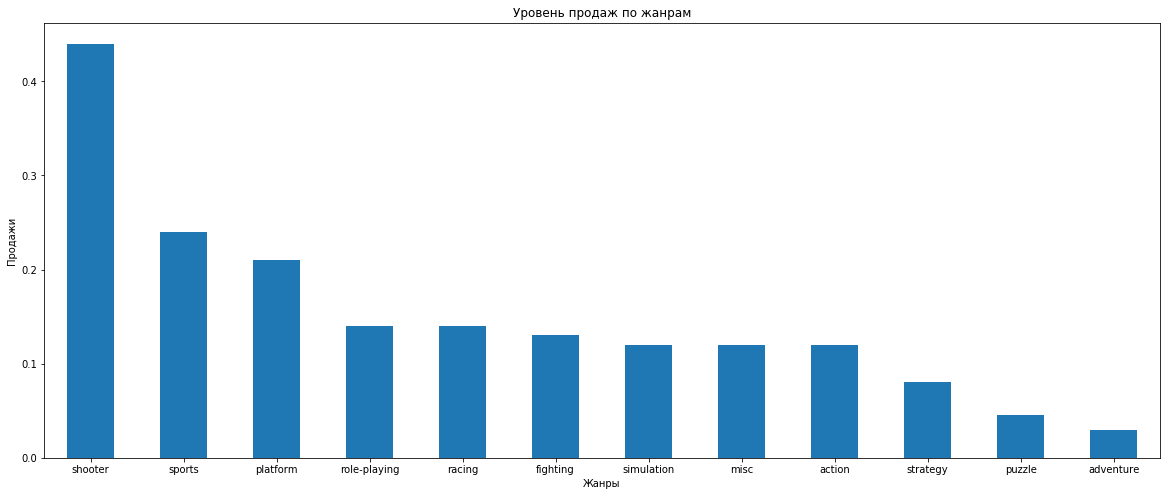

In [38]:
games_for_the_perod.groupby('genre')['total_sales'].median().sort_values()[::-1].plot.bar(figsize=(20,8))
plt.xticks(rotation=0)
plt.title('Уровень продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

*Выводы:*
Ой как я ошибался... Оказалось, что экшн не такой популярный. Это говорит о том, что у этого жанра очень много игр, которые мало покупают. А вот у шутера гораздо больше игр покупают в большом количестве.

In [39]:
for platform in list_of_5:
    print('Дисперсия', platform.upper(),':', np.var(games[games['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(games[games['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  games[games['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  games[games['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 2.121796544989326
Стандартное отклонение PS4 : 1.4566387832916319
Среднее PS4 : 6.748249027237354
Медиана PS4 : 7.0


Дисперсия XONE : 1.8965188383045526
Стандартное отклонение XONE : 1.377141546212499
Среднее XONE : 6.521428571428572
Медиана XONE : 6.8


Дисперсия X360 : 2.0752880868793646
Стандартное отклонение X360 : 1.4405860220338682
Среднее X360 : 6.683540372670807
Медиана X360 : 7.0


Дисперсия 3DS : 2.0189433875016514
Стандартное отклонение 3DS : 1.4208952767539385
Среднее 3DS : 6.831609195402299
Медиана 3DS : 7.1


Дисперсия PS3 : 2.1327377071986624
Стандартное отклонение PS3 : 1.460389573777717
Среднее PS3 : 6.726567844925884
Медиана PS3 : 7.1




**Общий вывод:**
1. Провел исследовательский анализ данных
2. Посмотрел сколько игр и на какие платформы выпускались в разные периоды. Прогресс развивается, платформы тоже, поэтому однозначно какой то критерий выявить достаточно сложно. Игровой индустрии стоит не отставать и нацеливаться на новые популярные платформы, которые живут в среднем около 10 лет, поэтому если игра выходит на стыке, то стоит задуматься, выпускать её на новой платформе.
3. Посмотрел, как менялись продажи по платформам. Определил 5 наиболее перспективных платформ. Все они живут в среднем около 10 лет (указывал выше).
4. Определил актуальный период, им будет считаться период с 2012 года.
...


6. Как уже указал выше, по платформам наиболее перспективны PS4,XONE,X360,3DS,PS3. Самые перспективные PS4, XONE. Так как они самые новые.
7. Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. По четырём графикам можно сделать вывод, что самые продаваемые платформа, это х360 и ps4, далее хone и ps3, их эпоха уже уходит, продаже падают.В нашем случае выбросы это какие-то популярные игры. Возможно, экскулюзивы. Пример 3ds маленький ящик и много выбросов. Как я понимаю основаная часть объема продаж происходит за счет этих выбросов. В то же время у XOne ситуация иная: большой ящик, длинный ус и мало выбросов, тоесть у xone покупают разные игры, причем, в немалом количестве.
8. Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам, но она везде достаточно низкая. Однозначно можно сказать, что оценка пользователей слабо влияет на продажи, в отличие от оценки критиков
9. Пункт выше относится практически ко всем платформам.
10. Лучше всего продаются игры жанра Шутер, хуже всего приключения.

## Составление портрета пользователя

**Задание:**
1. Составьте портрет пользователя каждого региона
2. Определите для пользователя каждого региона (NA, EU, JP):
3. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
4. Самые популярные жанры (топ-5). Поясните разницу.
5. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишу функцию распределения популярных платформ и жанров по регионам (топ 5). Дополнительно создам отдельный столбец рейтинга ESRB.

In [40]:
games_for_the_perod.loc[games_for_the_perod['rating'].isna(), 'rating'] = 'без рейтинга'
print(games_for_the_perod[games_for_the_perod['rating'].isna()]['rating'].count())
games_for_the_perod['rating']

0


16                  m
23                  m
31       без рейтинга
33       без рейтинга
34                  m
             ...     
16703    без рейтинга
16707    без рейтинга
16710    без рейтинга
16712    без рейтинга
16714    без рейтинга
Name: rating, Length: 2886, dtype: object

In [41]:
def regions_plots(groupby, region_sales, ax):
    pivot = games_for_the_perod.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color = {'na_sales': 'red', 'eu_sales': 'green', 'jp_sales': 'blue'}
    plot = pivot.plot(kind='bar', ec='black', title=title[region_sales], ax=axes[ax], 
                   fontsize=20, color=color[region_sales], rot=20)
    plot.legend(prop={'size':18})
    plot.set_xlabel('')
    plot.title.set_size(20)

In [42]:
esrb_rait = {'e': 'Для всех', 'm': '> 17 лет', 't': '13-17 лет', 'e10+': '>10 лет', 'k-a': 'Для всех(устар.)', 'без рейтинга': 'Нет классиф.'}
games_for_the_perod['esrb_raiting'] = games_for_the_perod[games_for_the_perod['rating'].notnull()]['rating'].map(esrb_rait)


In [43]:
#games['esrb_raiting']

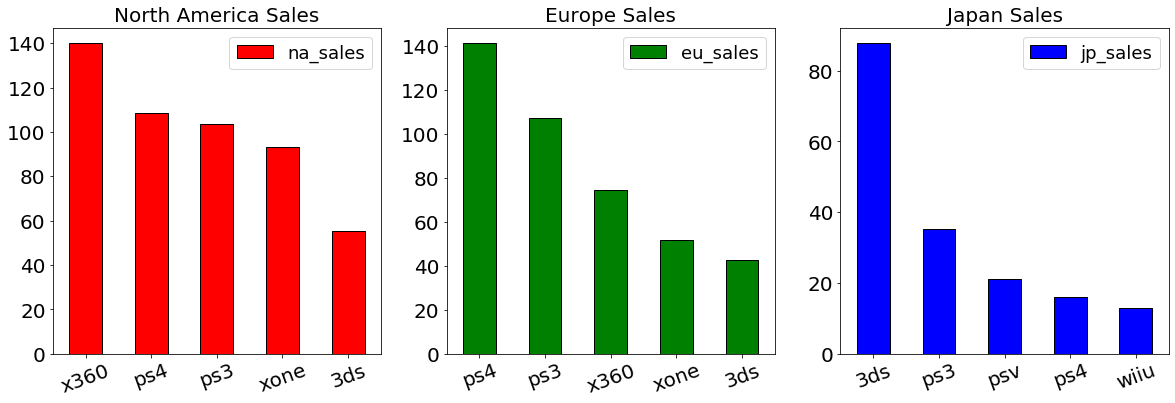

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
regions_plots('platform', 'na_sales', 0)
regions_plots('platform', 'eu_sales', 1)
regions_plots('platform', 'jp_sales', 2)

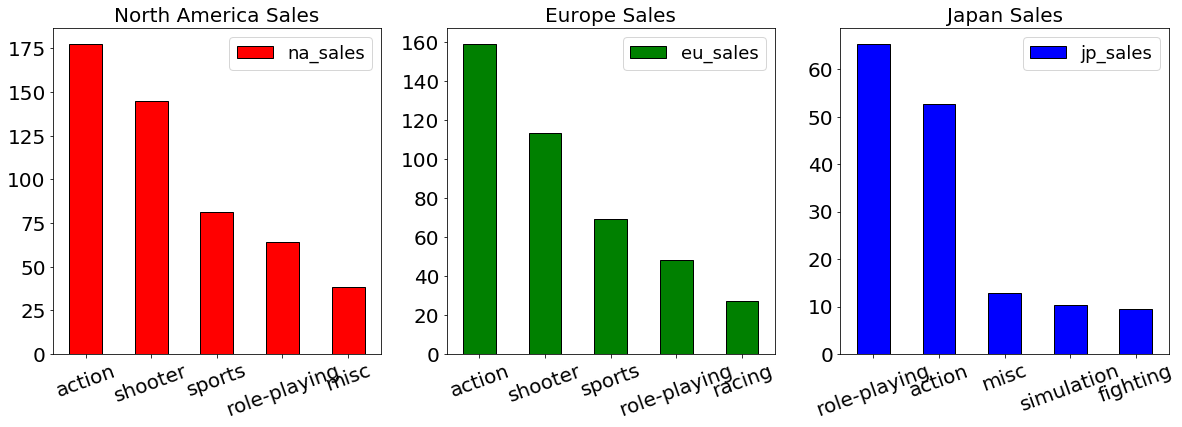

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
regions_plots('genre', 'na_sales', 0)
regions_plots('genre', 'eu_sales', 1)
regions_plots('genre', 'jp_sales', 2)

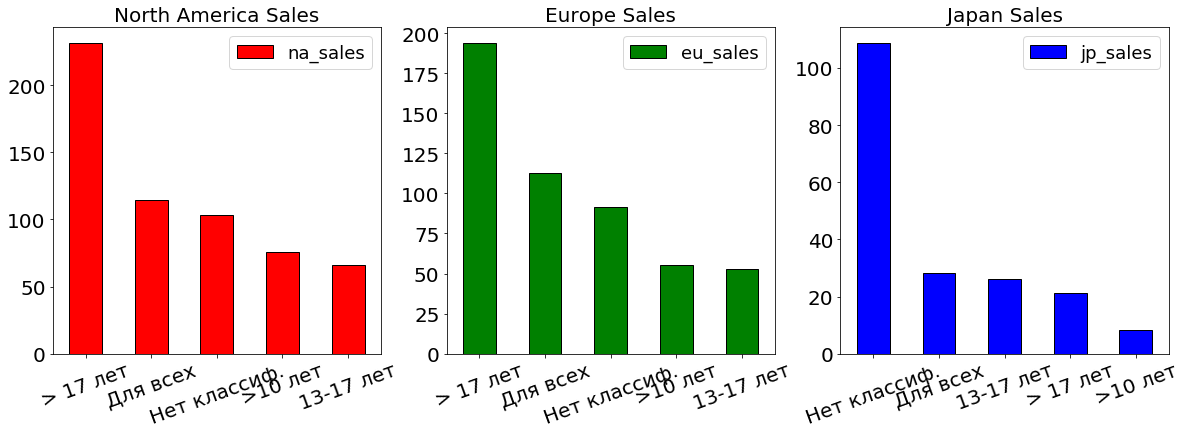

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

regions_plots('esrb_raiting', 'na_sales', 0)
regions_plots('esrb_raiting', 'eu_sales', 1)
regions_plots('esrb_raiting', 'jp_sales', 2)

**Выводы:**
1. Составил портрет пользователя каждого региона.
Определил для пользователя каждого региона (NA, EU, JP):


В Северной Америке имеют большую популярность приставки прошлого поколения X360 и PS4, PS3.
В Европе одинаково популярны PS4, PS3, X360.
В Японии, как обычно, всё наоборот. Лидер - 3DS. За ними PS3 и PSV.

Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшнов, спортивных игр и шутеров. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки. В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и игры других жанров.

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "> 17 лет", далее идет "Для всех" и "Без классификации". В Японии опять не так. Первое место у игр без классификации, а вот на втором и третьем с минимальным отрывом - игры для всех и для лиц от 13 до 17 лет.

В Японии много игр без рейтинга. Скорее всего, дело тут в том, что ESRB не работает в японии, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть своё рейтингование. Ну и чтобы конфликтов в классификациях не было. Хотя, если они продают игры на своем рынке, то присвоение рейтинга, как я понимаю,должно быть обязательным. Значит, дело еще может быть в том, что ESRB таблица это склейка двух таблиц: Запада и Востока. Соответственно, разница в восточных и западных рынках говорит о том, что пропуски не случайны.

## Проверка гипотез

Проверьте гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
3. Задайте самостоятельно пороговое значение alpha.

Поясните:
1. Как вы сформулировали нулевую и альтернативную гипотезы;
2. Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

Сформулирую гипотезы:
1. Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [47]:
one_for_hyp = games[(games['platform']=='xone') & (games['year_of_release']>2012)]['user_score']
pc_for_hyp = games[(games['platform']=='pc') & (games['year_of_release']>2012)]['user_score']
one_for_hyp.mean()

6.521428571428572

In [48]:
pc_for_hyp.mean()

6.269677419354839

In [49]:
alpha = .01
result = st.ttest_ind(one_for_hyp.dropna(), pc_for_hyp.dropna(), equal_var=False)
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Опровергается нулевая гипотеза")
else:
    print("Не опровергается нулевая гипотеза")

p-значение: 0.14759594013430463
Не опровергается нулевая гипотеза


*Вывод:*
p-значение позволяет сделать вывод, что гипотеза не опровергается. Тоесть рейтинги могут быть одинаковыми.

Сформулирую гипотезы:
1. Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
2. Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [50]:
action_for_hyp = games[(games['genre']=='action') & (games['year_of_release']>2012)]['user_score']
sports_for_hyp = games[(games['genre']=='sports') & (games['year_of_release']>2012)]['user_score']
action_for_hyp.mean()

6.837532133676093

In [51]:
sports_for_hyp.mean()

5.238124999999999

In [52]:
alpha = .01
results = st.ttest_ind(action_for_hyp.dropna(), sports_for_hyp.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Опровергается нулевая гипотеза")
else:
    print("Не опровергается нулевая гипотеза")

p-значение: 1.4460039700704315e-20
Опровергается нулевая гипотеза


*Вывод*:
1. Получив p-value, опровергается нулевая гипотеза. Таким образом, практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

**Выводы гипотез:**
1. p-значение позволяет сделать вывод, что гипотеза не опровергается. Тоесть рейтинги могут быть одинаковыми.
2. Практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

## Общий вывод

Подготовил данные.
1. Подготовил данные.
2. Заменил названия столбцов (привел к нижнему регистру);
3. Преобразовал данные столбца year_of_release в int 64.
4. По поводу пропусков жёстких требований не стояло, пока решил не трогать их, поскольку на анализ пока не влияют. 
5. Причинами пропуска могут быть: снизкая популярность игры (не получила оценку критиков), низкое распространение игры (только в конктретном регионе, например только Япония), в единичных случаях это сокрытие информации, ошибки в заполнении таблицы. 
6. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Аббревиатуру описал, заменил на NaN.
7. Создал отдельный столбец с суммарными продажами по регионам.
1. Провел исследовательский анализ данных
2. Посмотрел сколько игр и на какие платформы выпускались в разные периоды. Прогресс развивается, платформы тоже, поэтому однозначно какой то критерий выявить достаточно сложно. Игровой индустрии стоит не отставать и нацеливаться на новые популярные платформы, которые живут в среднем около 10 лет, поэтому если игра выходит на стыке, то стоит задуматься, выпускать её на новой платформе.
3. Посмотрел, как менялись продажи по платформам. Определил 5 наиболее перспективных платформ. Все они живут в среднем около 10 лет (указывал выше).
4. Определил актуальный период, им будет считаться период с 2012 года.
6. Как уже указал выше, по платформам наиболее перспективны PS4,XONE,3DS. Самые перспективные PS4, XONE. Так как они самые новые.
7. Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Самая популярная платформа - это PS4, так как у 3DS основная масса продаж находится в границах до 1 млн, у XOne до 1,5 млн и далее резкие скачки.
8. Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам, но она везде достаточно низкая. Однозначно можно сказать, что оценка пользователей слабо влияет на продажи, в отличие от оценки критиков
9. Пункт выше относится практически ко всем платформам.
10. Лучше всего продаются игры жанра Шутер, хуже всего приключения.
17. Составил портрет пользователя каждого региона.
Определил для пользователя каждого региона (NA, EU, JP):
В Северной Америке имеют большую популярность приставки прошлого поколения X360 и PS4, PS3.
В Европе одинаково популярны PS4, PS3, X360.
В Японии, как обычно, всё наоборот. Лидер - 3DS. За ними PS3 и PSV.
Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшнов, спортивных игр и шутеров. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки. В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и игры других жанров.
В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "> 17 лет", далее идет "Для всех" и "Без классификации". В Японии опять не так. Первое место у игр без классификации, а вот на втором и третьем с минимальным отрывом - игры для всех и для лиц от 13 до 17 лет. В Японии много игр без рейтинга. Скорее всего, дело тут в том, что ESRB не работает в японии, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть своё рейтингование. Ну и чтобы конфликтов в классификациях не было. Хотя, если они продают игры на своем рынке, то присвоение рейтинга, как я понимаю,должно быть обязательным. Значит, дело еще может быть в том, что ESRB таблица это склейка двух таблиц: Запада и Востока. Соответственно, разница в восточных и западных рынках говорит о том, что пропуски не случайны.
18. Проверил гипотезы: 
p-значение позволяет сделать вывод, что гипотеза не опровергается. Тоесть рейтинги могут быть одинаковыми.
Практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.